<a href="https://colab.research.google.com/github/fardinpratama/mini-project-from-sanbercode/blob/master/Prediksi_gaji_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center> Prediksi probabilitas gaji seseorang di atas 5 juta </center> </h1>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import libary
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
df_train  = pd.read_csv('/content/drive/My Drive/Untitled Folder/Pendapatan.csv')
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


keterangan : <br>
 0 : Gaji <= 5jt <br>
 1 : Gaji > 5jt

# Preprocessing Data

In [0]:
df_train['Jenis Kelamin'] = df_train['Jenis Kelamin'].replace(['Laki2', 'Perempuan'],[1,0])
columns = ['Kelas Pekerja','Status Perkawinan','Pekerjaan','Pendidikan']
df_train = pd.get_dummies(df_train,columns=columns )

In [0]:
df_train.head()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,Kelas Pekerja_?,...,Pendidikan_9th,Pendidikan_D3,Pendidikan_D4,Pendidikan_Doktor,Pendidikan_Master,Pendidikan_Pendidikan Tinggi,Pendidikan_SD,Pendidikan_SMA,Pendidikan_Sarjana,Pendidikan_Sekolah Professional
0,27247,59,139616,14,1,0.0,0.0,50.0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1640,52,158993,9,0,0.0,0.0,38.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,45206,52,284648,9,0,0.0,0.0,99.0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,16154,45,132847,9,0,0.0,0.0,40.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,43023,28,103432,9,1,0.0,0.0,45.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
#standarisasi
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
datscaler = stdscaler.fit_transform(df_train.drop(columns='Gaji'))

In [0]:
columns = list(df_train.drop(columns='Gaji').columns)
dfScaler = pd.DataFrame(data=datscaler, columns=columns)

In [0]:
dfScaler.head()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja_?,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,...,Pendidikan_9th,Pendidikan_D3,Pendidikan_D4,Pendidikan_Doktor,Pendidikan_Master,Pendidikan_Pendidikan Tinggi,Pendidikan_SD,Pendidikan_SMA,Pendidikan_Sarjana,Pendidikan_Sekolah Professional
0,0.232971,1.484251,-0.474617,1.521522,0.702443,-0.145415,-0.216012,0.772005,-0.246784,-0.294913,...,-0.126426,-0.184207,-0.208738,-0.112163,4.164556,-0.534411,-0.040863,-0.691924,-0.443904,-0.132865
1,-1.612993,0.973097,-0.291080,-0.420596,-1.423603,-0.145415,-0.216012,-0.197102,-0.246784,-0.294913,...,-0.126426,-0.184207,-0.208738,-0.112163,-0.240122,-0.534411,-0.040863,1.445246,-0.443904,-0.132865
2,1.527605,0.973097,0.899116,-0.420596,-1.423603,-0.145415,-0.216012,4.729191,-0.246784,3.390829,...,-0.126426,-0.184207,-0.208738,-0.112163,-0.240122,-0.534411,-0.040863,1.445246,-0.443904,-0.132865
3,-0.566704,0.461943,-0.538733,-0.420596,-1.423603,-0.145415,-0.216012,-0.035585,-0.246784,-0.294913,...,-0.126426,-0.184207,-0.208738,-0.112163,-0.240122,-0.534411,-0.040863,1.445246,-0.443904,-0.132865
4,1.370236,-0.779432,-0.817350,-0.420596,0.702443,-0.145415,-0.216012,0.368210,-0.246784,-0.294913,...,-0.126426,-0.184207,-0.208738,-0.112163,-0.240122,-0.534411,-0.040863,1.445246,-0.443904,-0.132865


In [0]:
X_train = dfScaler.drop(columns = ["id"])
y_train = df_train['Gaji']
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.25,random_state=31,stratify=y_train)

# Model K-Neighbour nearst

In [0]:
# build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [0]:
#memilih hyperparamter
model_KNN = KNeighborsClassifier()
from sklearn.model_selection  import RandomizedSearchCV
params = {"weights" : ('uniform', 'distance'),
         "n_neighbors" : range(5,25)}
grid = RandomizedSearchCV(
    model_KNN,
    params,
    n_jobs=4,
    n_iter =20,
    cv=10,
    verbose=4,
    scoring = "accuracy"
)

In [0]:
clf = grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 36.8min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 73.3min finished


In [0]:
clf.best_params_

{'weights': 'uniform', 'n_neighbors': 23}

In [0]:
model_KNN = KNeighborsClassifier(n_neighbors=23, weights='uniform')
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [0]:
y_predict_KNN = model_KNN.predict(X_test)

# Model Decision tree

In [0]:
#untuk decssion tree
from sklearn.tree import DecisionTreeClassifier
model_DCT = DecisionTreeClassifier()

In [0]:
from sklearn.model_selection  import RandomizedSearchCV
params = {"criterion" : ("gini", "entropy"),
         "random_state" : range(10,60),
          "splitter" : ("best", "random")
         }
grid = RandomizedSearchCV(
    model_DCT,
    params,
    n_jobs=4,
    n_iter =20,
    cv=10,
    verbose=4,
    scoring = "accuracy"
)

In [0]:
clf = grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   51.5s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  2.5min finished


In [0]:
clf.best_params_

{'splitter': 'best', 'random_state': 13, 'criterion': 'entropy'}

In [0]:
model_DCT = DecisionTreeClassifier(criterion =  'entropy', random_state= 13, splitter = 'best')

In [0]:
model_DCT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [0]:
y_predict_DCT = model_DCT.predict(X_test)

# Model Random Forest

In [0]:
#model random forest
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()

In [0]:
from sklearn.model_selection  import RandomizedSearchCV
params = {"criterion" : ("gini", "entropy"),
         "n_estimators" : range(10,101),
          "max_depth" : range(0,10), 
          "random_state" : range(0,10),
          "max_features" : ("auto", "sqrt", "log2")
         }
grid = RandomizedSearchCV(
    model_RFC,
    params,
    n_jobs=4,
    n_iter =20,
    cv=10,
    verbose=4,
    scoring = "accuracy"
)

In [0]:
clf = grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   42.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  5.0min finished


In [0]:
clf.best_params_

{'random_state': 1,
 'n_estimators': 39,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy'}

In [0]:
model_RFC = RandomForestClassifier(max_features= 'sqrt',criterion="entropy", n_estimators=100, random_state=1, max_depth=9)

In [0]:
model_RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
y_predict_RFC = model_RFC.predict(X_test)

# Evaluasi Model menggunakan Matriks AUC

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_predict_KNN)
fpr_DCT, tpr_DCT, _ = roc_curve(y_test, y_predict_DCT)
fpr_RFC, tpr_RFC, _ = roc_curve(y_test, y_predict_RFC)

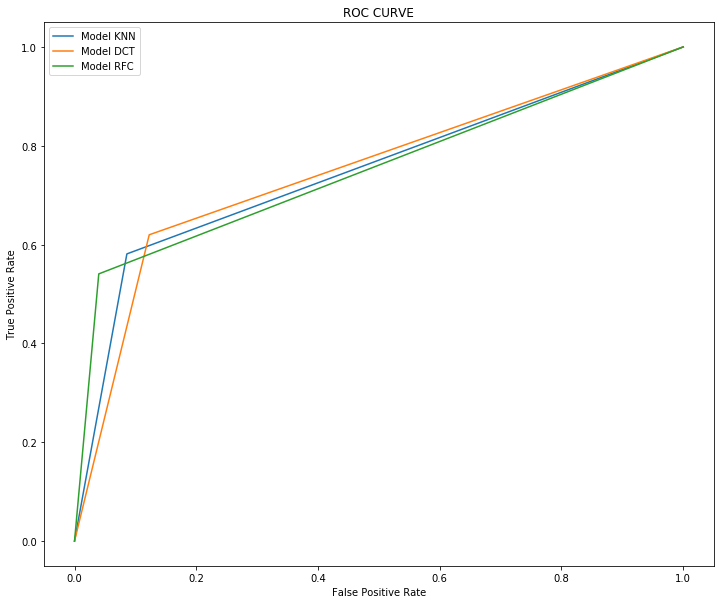

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=[12,10])
plt.plot(fpr_KNN, tpr_KNN, label = "Model KNN")
plt.plot(fpr_DCT, tpr_DCT, label = "Model DCT")
plt.plot(fpr_RFC, tpr_RFC, label = "Model RFC")
plt.title("ROC CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [0]:
Score_KNN = roc_auc_score(y_test, y_predict_KNN)
Score_DCT = roc_auc_score(y_test, y_predict_DCT)
print("score KNN : ", Score_KNN, " dan score DCT : ", Score_DCT)

score KNN :  0.7475474148974837  dan score DCT :  0.7485474923582022


In [0]:
Score_DCT = roc_auc_score(y_test, y_predict_DCT)
Score_KNN = roc_auc_score(y_test, y_predict_KNN)
Score_RFC= roc_auc_score(y_test, y_predict_RFC)
print("score KNN : ", Score_KNN, " dan score DCT : ", Score_DCT," dan score RFC : ", Score_RFC)

score KNN :  0.7475474148974837  dan score DCT :  0.7485474923582022  dan score RFC :  0.7504034213803501


 <h4> Berdasarkan hasil score yang di peroleh, maka model yang akan di pakai adalah model Random Forest </h4>

# Melakukan Prediksi berdasarkan model yang terpilih

In [6]:
data_test = pd.read_csv("/content/drive/My Drive/Untitled Folder/Pendapatan_test.csv")
data_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [0]:
data_test['Jenis Kelamin'] = data_test['Jenis Kelamin'].replace(['Laki2', 'Perempuan'],[1,0])
columns = ['Kelas Pekerja','Status Perkawinan','Pekerjaan','Pendidikan']
data_test = pd.get_dummies(data_test,columns=columns )
data_test.head()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja_?,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,...,Pendidikan_9th,Pendidikan_D3,Pendidikan_D4,Pendidikan_Doktor,Pendidikan_Master,Pendidikan_Pendidikan Tinggi,Pendidikan_SD,Pendidikan_SMA,Pendidikan_Sarjana,Pendidikan_Sekolah Professional
0,47933,30,99761,11,0,0.0,0.0,40.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44213,28,202206,9,1,0.0,0.0,50.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,20823,34,199934,10,1,0.0,0.0,40.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40565,51,373448,10,1,0.0,28028000.0,40.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9860,20,144685,10,0,0.0,22428000.0,40.0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [0]:
#standarisasi
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
datscaler = stdscaler.fit_transform(data_test)
columns = list(data_test.columns)
dfScaler = pd.DataFrame(data=datscaler, columns=columns)
dfScaler.head()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja_?,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,...,Pendidikan_9th,Pendidikan_D3,Pendidikan_D4,Pendidikan_Doktor,Pendidikan_Master,Pendidikan_Pendidikan Tinggi,Pendidikan_SD,Pendidikan_SMA,Pendidikan_Sarjana,Pendidikan_Sekolah Professional
0,1.742540,-0.612932,-0.847976,0.371785,-1.407829,-0.143024,-0.219254,-0.026687,-0.247012,-0.287321,...,-0.120773,-0.18329,4.692460,-0.104657,-0.236634,-0.541427,-0.039561,-0.689005,-0.44119,-0.126845
1,1.472632,-0.758052,0.114735,-0.413076,0.710314,-0.143024,-0.219254,0.779877,-0.247012,-0.287321,...,-0.120773,-0.18329,-0.213108,-0.104657,-0.236634,-0.541427,-0.039561,1.451369,-0.44119,-0.126845
2,-0.224453,-0.322692,0.093384,-0.020646,0.710314,-0.143024,-0.219254,-0.026687,-0.247012,-0.287321,...,-0.120773,-0.18329,-0.213108,-0.104657,-0.236634,1.846972,-0.039561,-0.689005,-0.44119,-0.126845
3,1.207947,0.910830,1.723954,-0.020646,0.710314,-0.143024,4.686112,-0.026687,-0.247012,-0.287321,...,-0.120773,-0.18329,-0.213108,-0.104657,-0.236634,1.846972,-0.039561,-0.689005,-0.44119,-0.126845
4,-1.019884,-1.338533,-0.425810,-0.020646,-1.407829,-0.143024,3.706019,-0.026687,4.048394,-0.287321,...,-0.120773,-0.18329,-0.213108,-0.104657,-0.236634,1.846972,-0.039561,-0.689005,-0.44119,-0.126845


In [0]:
X_test_predict = dfScaler.drop(columns="id")

In [0]:
#melakukan prediksi bedasarkan model yang telah di buat
y_predict_test = model_DCT.predict(X_test_predict)

In [0]:
hasil_gaji = pd.DataFrame({"Gaji" : y_predict_test})

In [0]:
hasil_gaji.head()

,Gaji
0,0
1,0
2,1
3,1
4,0


In [7]:
data_test = pd.read_csv("/content/drive/My Drive/Untitled Folder/Pendapatan_test.csv")
data_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [0]:
#menggabungkan data hasil 
hasil = pd.concat([data_test,hasil_gaji], axis=1)
hasil.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,47933,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0,0
1,44213,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0,0
2,20823,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0,1
3,40565,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0,1
4,9860,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0,0


In [0]:
hasil_fix = pd.concat([data_test['id'],hasil_gaji], axis=1)

In [0]:
hasil_fix.to_csv("hasil_gaji_DCT.csv", index=False)

In [0]:
RFC  = pd.read_csv("hasil_gaji_RFC.csv")
DCT  = pd.read_csv("hasil_gaji_DCT.csv")
KNN  = pd.read_csv("hasil_gaji_KNN.csv")

In [0]:
RFC['Gaji'].value_counts()

0    8107
1    1492
Name: Gaji, dtype: int64

In [0]:
DCT['Gaji'].value_counts()

0    7302
1    2297
Name: Gaji, dtype: int64

In [0]:
KNN['Gaji'].value_counts()

0    7707
1    1892
Name: Gaji, dtype: int64